In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import codecs
import re
import os.path

import re
import unicodedata
import string
from nltk.corpus import stopwords

from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction import text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np
import sklearn.naive_bayes as nb
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

#### Functions load files

In [86]:
def load_movies(path2data): # 1 classe par répertoire
    alltxts = [] # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            txt = open(path2data+cl+'/'+f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt+=1 # chg répertoire = cht classe
        
    return alltxts,labs

#### Init and show files

In [87]:
path = "./movies1000/"

X_movies,y_movies = load_movies(path)

In [88]:
path = "./testSentiment.txt"
f = open(path,encoding="utf8")
X_test_sentiments = np.array(f.readlines())

In [5]:
print(len(X_movies),len(y_movies))
print(X_movies[0])
print(y_movies[0])
print("\n#######################################\n\n")
print(X_movies[-1])
print(y_movies[-1])

2000 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , 

In [6]:
print(len(X_test_sentiments))
print(X_test_sentiments[0])
print("\n")
print(X_test_sentiments[-1])

25000
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.



This is one of the dumbest films, I've ever seen. It rips off nearly ever type of thriller and manages to make a mess of them all.<br /><br />There's not a single good line or character in the whole mess. If there was a plot, it was an afterthought and as far as acting goes, there's nothing good to say so Ill say nothing. I honestly 

In [7]:
vectorizer = CountVectorizer()
X_transform_movies = vectorizer.fit_transform(X_movies)
mots_uniques = vectorizer.get_feature_names()
print('Nombre de mots uniques =>',len(vectorizer.get_feature_names()))

Nombre de mots uniques => 39659


# Analyse

In [8]:
nb_occurs = np.sum(X_transform_movies.toarray(), axis=0)
counter = Counter( { mots_uniques[i] : nb_occurs[i] for i in range(len(mots_uniques)) } )
counter.most_common(100)

[('the', 76529),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ('is', 25195),
 ('in', 21822),
 ('it', 16107),
 ('that', 15924),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961),
 ('his', 9587),
 ('this', 9578),
 ('film', 9517),
 ('he', 8864),
 ('but', 8634),
 ('on', 7385),
 ('are', 6949),
 ('by', 6261),
 ('be', 6174),
 ('one', 5852),
 ('movie', 5771),
 ('an', 5744),
 ('who', 5692),
 ('not', 5577),
 ('you', 5316),
 ('from', 4999),
 ('at', 4986),
 ('was', 4940),
 ('have', 4901),
 ('they', 4825),
 ('has', 4719),
 ('her', 4522),
 ('all', 4373),
 ('there', 3770),
 ('like', 3690),
 ('so', 3683),
 ('out', 3637),
 ('about', 3523),
 ('up', 3405),
 ('more', 3347),
 ('what', 3322),
 ('when', 3258),
 ('which', 3161),
 ('or', 3148),
 ('she', 3141),
 ('their', 3122),
 ('some', 2985),
 ('just', 2905),
 ('can', 2882),
 ('if', 2799),
 ('we', 2775),
 ('him', 2633),
 ('into', 2623),
 ('even', 2565),
 ('only', 2495),
 ('than', 2474),
 ('no', 2472),
 ('good', 2411),
 ('time', 2411),
 ('most', 2306),
 (

On constate directement que les mots les plus presents sont des stopwords, nous allons voir plus tard s'il est mieux de les enlever.

Essayons de voir a quoi ressemble les donnees positives et negatives separement

In [89]:
movies_pos = []
movies_neg = []
for i in range(len(y_movies)):
    if y_movies[i] == 1:
        movies_pos.append(X_movies[i])
    else:
        movies_neg.append(X_movies[i])

### Movies Positives

In [90]:
txt_pos = ' '.join(movies_pos)

In [91]:
wordcloud_pos = WordCloud(background_color = 'white').generate(txt_pos)

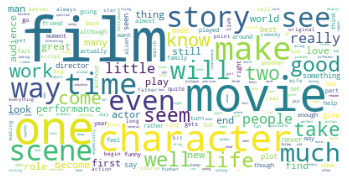

In [92]:
plt.figure()
#plt.title("WordCloud des movies positives sans supression des similar most commons")
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.savefig('./graphs/fig1.png')
plt.show();

### Movies Negatives

In [93]:
txt_neg = ' '.join(movies_neg)

In [94]:
wordcloud_neg = WordCloud(background_color = 'black').generate(txt_neg)

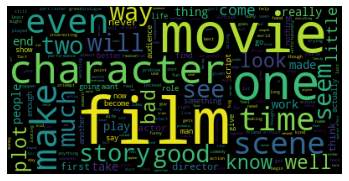

In [95]:
plt.figure()
#plt.title("WordCloud des movies negatives sans supression des similar most commons")
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.savefig('./graphs/fig2.png')
plt.show();

On s'apercoit ici que dans les deux cas les mots les plus frequents sont similaires.
Il s'agit en plus de mot relatif au vocabulaire du cinema et non en rapport avec le sentiments de l'utilisateur

Mais aussi, on voit clairement les stopwords sont bien trop presents, via le most_common sur tout le dataset.

Essayons de voir ce qui se passe si nous enlevons les 25 mots communs les plus recurrents

### Supression des stopwords et des mots en communs (20 plus recurrents)

In [96]:
movies_posSW = []
movies_negSW = []
for i in range(len(y_movies)):
    if y_movies[i] == 1:
        movies_posSW.append(X_movies[i])
    else:
        movies_negSW.append(X_movies[i])

#### Movies Positives

In [97]:
vectorizerPos = CountVectorizer(stop_words='english')
transform_movies_pos = vectorizerPos.fit_transform(movies_pos)
mots_uniques_pos = vectorizerPos.get_feature_names()
print('Nombre de mots uniques pos =>',len(vectorizerPos.get_feature_names()))

Nombre de mots uniques pos => 30021


In [98]:
nb_occurs_pos = np.sum(transform_movies_pos.toarray(), axis=0)
counterPos = Counter( { mots_uniques_pos[i] : nb_occurs_pos[i] for i in range(len(mots_uniques_pos)) } )
counterPos.most_common(50)

[('film', 5230),
 ('movie', 2525),
 ('like', 1802),
 ('just', 1342),
 ('good', 1248),
 ('story', 1246),
 ('time', 1243),
 ('character', 1078),
 ('life', 1057),
 ('characters', 986),
 ('way', 929),
 ('films', 884),
 ('does', 866),
 ('best', 829),
 ('make', 791),
 ('people', 789),
 ('really', 777),
 ('little', 775),
 ('man', 764),
 ('great', 751),
 ('scene', 727),
 ('new', 723),
 ('world', 665),
 ('love', 661),
 ('scenes', 638),
 ('movies', 635),
 ('doesn', 602),
 ('plot', 596),
 ('director', 586),
 ('don', 576),
 ('know', 572),
 ('makes', 561),
 ('performance', 549),
 ('seen', 541),
 ('end', 531),
 ('action', 520),
 ('work', 520),
 ('role', 488),
 ('years', 488),
 ('real', 485),
 ('year', 485),
 ('big', 467),
 ('old', 463),
 ('right', 454),
 ('things', 451),
 ('john', 448),
 ('audience', 444),
 ('star', 444),
 ('young', 439),
 ('family', 434)]

#### Movies Negatives

In [99]:
vectorizerNeg = CountVectorizer(stop_words='english')
transform_movies_neg = vectorizerNeg.fit_transform(movies_neg)
mots_uniques_neg = vectorizerNeg.get_feature_names()
print('Nombre de mots uniques neg =>',len(vectorizerNeg.get_feature_names()))

Nombre de mots uniques neg => 28084


In [100]:
nb_occurs_neg = np.sum(transform_movies_neg.toarray(), axis=0)
counterNeg = Counter( { mots_uniques_neg[i] : nb_occurs_neg[i] for i in range(len(mots_uniques_neg)) } )
counterNeg.most_common(50)

[('film', 4287),
 ('movie', 3246),
 ('like', 1888),
 ('just', 1563),
 ('time', 1168),
 ('good', 1163),
 ('bad', 1034),
 ('character', 942),
 ('story', 923),
 ('plot', 917),
 ('characters', 873),
 ('make', 851),
 ('really', 781),
 ('way', 764),
 ('little', 726),
 ('don', 718),
 ('does', 702),
 ('doesn', 675),
 ('scene', 670),
 ('people', 666),
 ('action', 652),
 ('films', 652),
 ('director', 651),
 ('know', 645),
 ('scenes', 636),
 ('man', 632),
 ('big', 597),
 ('movies', 571),
 ('new', 569),
 ('better', 531),
 ('end', 531),
 ('life', 529),
 ('best', 504),
 ('work', 500),
 ('isn', 491),
 ('script', 478),
 ('audience', 470),
 ('going', 470),
 ('think', 459),
 ('love', 458),
 ('funny', 451),
 ('thing', 448),
 ('gets', 442),
 ('actually', 439),
 ('look', 437),
 ('makes', 431),
 ('comedy', 430),
 ('real', 430),
 ('did', 422),
 ('long', 415)]

In [101]:
def remove_same(nb_remove,t1,t2):
    """
    Renvoie la liste des mots en communs entre t1 et t2, dans le vocabulaire de leur nb_remove plus recurrents.
    """
    t1_values = []
    t2_values = []
    for i in t1.most_common(nb_remove):
         t1_values.append(i[0])
    for i in t2.most_common(nb_remove):
         t2_values.append(i[0])
            
    common = list(set(t1_values).intersection(t2_values))
    return common
    #text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [102]:
removeWords = remove_same(25,counterPos,counterNeg)

In [103]:
removeWords

['character',
 'does',
 'films',
 'characters',
 'good',
 'time',
 'little',
 'just',
 'scenes',
 'movie',
 'make',
 'people',
 'story',
 'way',
 'scene',
 'like',
 'really',
 'film']

In [104]:
stopsWordsUP = text.ENGLISH_STOP_WORDS.union(removeWords)

In [105]:
wordcloud_pos = WordCloud(background_color = 'white', stopwords=stopsWordsUP).generate(txt_pos)

In [109]:
plt.figure()
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.savefig('./graphs/posSW.png')
plt.show();

In [110]:
wordcloud_neg = WordCloud(background_color = 'black', stopwords=stopsWordsUP).generate(txt_neg)

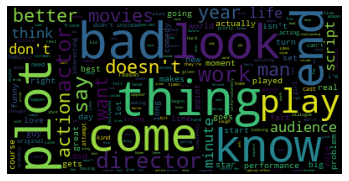

In [111]:
plt.figure()
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.savefig('./graphs/negSW.png')
plt.show();

Ici on voit qu'on a une representation des mots qui est plus representative des classes surtout pour les negatives

Les majuscules ne sont pas necessaires car certes de maniere generale on peut penser que les personnes mecontentent s'exprimer avec des mots forts et donc en MAJUSCULES. Sauf qu'ici c'est surtout la recherche des termes negatives et positives qui nous interesse donc le fait d'avoir le memes mot en minuscule ou maj n'a pas d'interet. C'est le sens des mots et leur signification et non leur syntaxe qui va nous aider a determiner le sentiment.

Un aspect qui pour le coup peut etre interessant c'est la lemmanisation surtout pour la negation car avec du bi-grammes on aura le <'t> qui pourra surement donc nous aider a realiser une meilleure prediction.

La racinisation n'est clairement pas une bonne idee car celui-ci va donc mettre les mots a leurs forme initiales donc nous n'allons plus avoir la forme negative des mots, ce qui va donc empecher de distinguer les deux classes.

#### Function to transform the text

In [29]:
def transform(text, punc=False,accentMaj=False,nb=False, stopW=False) :
    text_transf = text
    
    for i in range(len(text)) :
        
        if punc:
            punc = string.punctuation  # recupération de la ponctuation
            punc += '\n\r\t'
            text_transf[i] = text_transf[i].translate(str.maketrans(punc, ' ' * len(punc)))  
        if accentMaj:
            # suppression des accents et des caractères non normalisés
            text_transf[i] = unicodedata.normalize('NFD', text_transf[i]).encode('ascii', 'ignore').decode("utf-8")
            text_transf[i] = text_transf[i].lower()
        
        if nb:
            # suppression des nombres
            text_transf[i] = re.sub('[0-9]+', '', text_transf[i]) # remplacer une séquence de chiffres par rien
        if stopW:
            for w in stopwords.words('english'):
                text_transf[i] = text_transf[i].replace(w, '') 
    return text_transf

#### All Vectorizer for all models

On va donc tester les modeles avec differentes transformation :
    <ul>
    <li>avec/sans stopWordUP</li>
    <li>1-gram car on a l'apostrophe qui est la plupart du temps present dans des mots negatives et de maniere generale le 1-gram marche bien comme dans la traduction donc a tester</li>
    <li>3-gram permettant la de peut-etre mettre en evidence les n't</li>
    </li>

In [30]:
vectorizerC_movies = CountVectorizer(max_features=10000)
vectorizerC_moviesSW = CountVectorizer(max_features=10000, stop_words=stopsWordsUP)
vectorizerC_movies1G = CountVectorizer(max_features=10000, ngram_range=(1,1))
vectorizerC_moviesSW1G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,1))
vectorizerC_movies2G = CountVectorizer(max_features=10000, ngram_range=(2,2))
vectorizerC_moviesSW2G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(2,2))
vectorizerC_movies12G = CountVectorizer(max_features=10000, ngram_range=(1,2))
vectorizerC_moviesSW2G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(2,2))
vectorizerC_movies3G = CountVectorizer(max_features=10000, ngram_range=(3,3))
vectorizerC_moviesSW3G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(3,3))
vectorizerC_movies123G = CountVectorizer(max_features=10000, ngram_range=(1,3))
vectorizerC_moviesSW123G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,3))

vectorizerTFIDF_movies = TfidfVectorizer(max_features=10000)
vectorizerTFIDF_moviesSW = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP)
vectorizerTFIDF_movies1G = TfidfVectorizer(max_features=10000, ngram_range=(1,1))
vectorizerTFIDF_moviesSW1G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,1))
vectorizerTFIDF_movies2G = TfidfVectorizer(max_features=10000, ngram_range=(2,2))
vectorizerTFIDF_moviesSW2G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(2,2))
vectorizerTFIDF_movies12G = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
vectorizerTFIDF_moviesSW12G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,2))
vectorizerTFIDF_movies3G = TfidfVectorizer(max_features=10000, ngram_range=(3,3))
vectorizerTFIDF_moviesSW3G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(3,3))
vectorizerTFIDF_movies123G = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
vectorizerTFIDF_moviesSW123G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,3))

In [32]:
vectorizers = {'vectorizerC_movies' : vectorizerC_movies, 'vectorizerC_moviesSW' : vectorizerC_moviesSW,
               'vectorizerC_movies1G' : vectorizerC_movies1G, 'vectorizerC_moviesSW1G' : vectorizerC_moviesSW1G,
               'vectorizerC_movies2G' : vectorizerC_movies2G, 'vectorizerC_moviesSW2G' : vectorizerC_moviesSW2G,
               'vectorizerC_movies12G' : vectorizerC_movies12G, 'vectorizerC_moviesSW12G' : vectorizerC_moviesSW12G,
               'vectorizerC_movies3G' : vectorizerC_movies3G, 'vectorizerC_moviesSW3G' : vectorizerC_moviesSW3G,
               'vectorizerC_movies123G' : vectorizerC_movies123G, 'vectorizerC_moviesSW123G' : vectorizerC_moviesSW123G,
               
               'vectorizerTFIDF_movies' : vectorizerTFIDF_movies, 'vectorizerTFIDF_moviesSW' : vectorizerTFIDF_moviesSW,
               'vectorizerTFIDF_movies1G' : vectorizerTFIDF_movies1G, 'vectorizerTFIDF_moviesSW1G' : vectorizerTFIDF_moviesSW1G,
               'vectorizerTFIDF_movies2G' : vectorizerTFIDF_movies2G, 'vectorizerTFIDF_moviesSW2G' : vectorizerTFIDF_moviesSW2G,
               'vectorizerTFIDF_movies12G' : vectorizerTFIDF_movies12G, 'vectorizerTFIDF_moviesSW12G' : vectorizerTFIDF_moviesSW12G,
               'vectorizerTFIDF_movies3G' : vectorizerTFIDF_movies3G, 'vectorizerTFIDF_moviesSW3G' : vectorizerTFIDF_moviesSW3G,
               'vectorizerTFIDF_movies123G' : vectorizerTFIDF_movies123G, 'vectorizerTFIDF_moviesSW123G' : vectorizerTFIDF_moviesSW123G}

#### Models and their parameters

In [33]:
clf = nb.MultinomialNB()
svc = svm.LinearSVC()
lin = linear_model.LogisticRegression()

param_grid_clf = {'alpha': [0.1,0.2,0.25,0.5,0.75,0.8,1]}
param_grid_svc = {'max_iter':[10000,15000,20000,25000], 'C': [0,1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}
param_grid_lin = {'max_iter':[3000,5000,10000,15000,20000,25000]}

In [34]:
#all_models = {clf:param_grid_clf, lin:param_grid_lin}
all_models = {clf:param_grid_clf, svc:param_grid_svc, lin:param_grid_lin}

#### Params for the Grid Search

In [35]:
accuracys = {}

for v in vectorizers:
    accuracys[v] = []

In [36]:
accuracys

{'vectorizerC_movies': [],
 'vectorizerC_moviesSW': [],
 'vectorizerC_movies1G': [],
 'vectorizerC_moviesSW1G': [],
 'vectorizerC_movies2G': [],
 'vectorizerC_moviesSW2G': [],
 'vectorizerC_movies12G': [],
 'vectorizerC_moviesSW12G': [],
 'vectorizerC_movies3G': [],
 'vectorizerC_moviesSW3G': [],
 'vectorizerC_movies123G': [],
 'vectorizerC_moviesSW123G': [],
 'vectorizerTFIDF_movies': [],
 'vectorizerTFIDF_moviesSW': [],
 'vectorizerTFIDF_movies1G': [],
 'vectorizerTFIDF_moviesSW1G': [],
 'vectorizerTFIDF_movies2G': [],
 'vectorizerTFIDF_moviesSW2G': [],
 'vectorizerTFIDF_movies12G': [],
 'vectorizerTFIDF_moviesSW12G': [],
 'vectorizerTFIDF_movies3G': [],
 'vectorizerTFIDF_moviesSW3G': [],
 'vectorizerTFIDF_movies123G': [],
 'vectorizerTFIDF_moviesSW123G': []}

In [37]:
X_movies_transform = transform(X_movies, punc=True, accentMaj=False, nb=True)

In [38]:
import warnings
warnings.simplefilter("ignore")


In [39]:
for vname in vectorizers:
    v = vectorizers[vname]
    
    print("Work on vectorizer => ",vname)
    vec_movies_train = v.fit_transform(X_movies_transform)
    for m in all_models:
        print("\tWith => ",m)
        grid_cv = GridSearchCV(m, all_models[m], n_jobs=-1, cv=5, scoring='f1')
        grid_cv.fit(vec_movies_train, y_movies)
        #print('Best score for', m, " => ", grid_cv.best_score_)
        #print('The parameters =>', grid_cv.best_params_)
        accuracys[vname].append((grid_cv.best_score_, grid_cv.best_params_))

Work on vectorizer =>  vectorizerC_movies
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies1G
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW1G
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies2G
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW2G
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies12G
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW12G
	With =>  MultinomialNB()
	With =>  LinearSVC()
	With =>  LogisticRegression()
Work on ve

In [112]:
accuracys

{'vectorizerC_movies': [(0.8071115821862103, {'alpha': 1}),
  (0.826890297720019, {'C': 2, 'max_iter': 10000}),
  (0.8397632999103012, {'max_iter': 3000})],
 'vectorizerC_moviesSW': [(0.8065994657482932, {'alpha': 1}),
  (0.8298045730794668, {'C': 1, 'max_iter': 10000}),
  (0.8404853476950764, {'max_iter': 3000})],
 'vectorizerC_movies1G': [(0.8071115821862103, {'alpha': 1}),
  (0.826890297720019, {'C': 2, 'max_iter': 10000}),
  (0.8397632999103012, {'max_iter': 3000})],
 'vectorizerC_moviesSW1G': [(0.8065994657482932, {'alpha': 1}),
  (0.8298045730794668, {'C': 1, 'max_iter': 10000}),
  (0.8404853476950764, {'max_iter': 3000})],
 'vectorizerC_movies2G': [(0.8142362525593926, {'alpha': 0.2}),
  (0.7920626420390002, {'C': 1, 'max_iter': 10000}),
  (0.8076231290263329, {'max_iter': 3000})],
 'vectorizerC_moviesSW2G': [(0.759182824190858, {'alpha': 1}),
  (0.7146222970001492, {'C': 4, 'max_iter': 10000}),
  (0.7368269973170302, {'max_iter': 3000})],
 'vectorizerC_movies12G': [(0.822753203

### Analyse des predictions

In [113]:
valuesNB = []
valuesSVC = []
valuesLR = []

paramsNB = []
paramsSVC = []
paramsLR = []

for a in accuracys:
    list_accu = accuracys[a]
    
    valuesNB.append(list_accu[0][0])    
    valuesSVC.append(list_accu[1][0])    
    valuesLR.append(list_accu[2][0])
    
    paramsNB.append(list_accu[0][1])    
    paramsSVC.append(list_accu[1][1])    
    paramsLR.append(list_accu[2][1])

In [114]:
d = {'MultinomialB': valuesNB, 'MultinomialB_Params': paramsNB, 'SVC': valuesSVC, 'SVC_params': paramsSVC, 'LinearRegression' : valuesLR, 'LR_params' : paramsLR}
pd_analyse = pd.DataFrame(data=d, index=list(accuracys.keys()))

d2 = {'MultinomialB': valuesNB, 'SVC': valuesSVC, 'LinearRegression' : valuesLR}
pd_analyse_score_only = pd.DataFrame(data=d2, index=list(accuracys.keys()))

In [115]:
pd_analyse

MultinomialB MultinomialB_Params       SVC  \
vectorizerC_movies                0.807112        {'alpha': 1}  0.826890   
vectorizerC_moviesSW              0.806599        {'alpha': 1}  0.829805   
vectorizerC_movies1G              0.807112        {'alpha': 1}  0.826890   
vectorizerC_moviesSW1G            0.806599        {'alpha': 1}  0.829805   
vectorizerC_movies2G              0.814236      {'alpha': 0.2}  0.792063   
vectorizerC_moviesSW2G            0.759183        {'alpha': 1}  0.714622   
vectorizerC_movies12G             0.822753     {'alpha': 0.75}  0.837629   
vectorizerC_moviesSW12G           0.807805        {'alpha': 1}  0.830889   
vectorizerC_movies3G              0.773419      {'alpha': 0.2}  0.719107   
vectorizerC_moviesSW3G            0.679972      {'alpha': 0.8}  0.603407   
vectorizerC_movies123G            0.826811     {'alpha': 0.25}  0.840605   
vectorizerC_moviesSW123G          0.804029        {'alpha': 1}  0.832036   
vectorizerTFIDF_movies            0.810807      {'alpha': 0.2}  0.862380   
vectorizerTFIDF_moviesSW          0.810953     {'alpha': 0.75}  0.853440   
vectorizerTFIDF_movies1G          0.810807      {'alpha': 0.2}  0.862380   
vectorizerTFIDF_moviesSW1G        0.810953     {'alpha': 0.75}  0.853440   
vectorizerTFIDF_movies2G          0.817999        {'alpha': 1}  0.825989   
vectorizerTFIDF_moviesSW2G        0.763588      {'alpha': 0.2}  0.740640   
vectorizerTFIDF_movies12G         0.830383      {'alpha': 0.2}  0.871409   
vectorizerTFIDF_moviesSW12G       0.810967        {'alpha': 1}  0.846807   
vectorizerTFIDF_movies3G          0.773767      {'alpha': 0.1}  0.755508   
vectorizerTFIDF_moviesSW3G        0.667182      {'alpha': 0.1}  0.637991   
vectorizerTFIDF_movies123G        0.830971      {'alpha': 0.1}  0.872447   
vectorizerTFIDF_moviesSW123G      0.809283        {'alpha': 1}  0.848057   

                                               SVC_params  LinearRegression  \
vectorizerC_movies            {'C': 2, 'max_iter': 10000}          0.839763   
vectorizerC_moviesSW          {'C': 1, 'max_iter': 10000}          0.840485   
vectorizerC_movies1G          {'C': 2, 'max_iter': 10000}          0.839763   
vectorizerC_moviesSW1G        {'C': 1, 'max_iter': 10000}          0.840485   
vectorizerC_movies2G          {'C': 1, 'max_iter': 10000}          0.807623   
vectorizerC_moviesSW2G        {'C': 4, 'max_iter': 10000}          0.736827   
vectorizerC_movies12G         {'C': 1, 'max_iter': 10000}          0.843317   
vectorizerC_moviesSW12G       {'C': 5, 'max_iter': 10000}          0.839443   
vectorizerC_movies3G          {'C': 3, 'max_iter': 10000}          0.735918   
vectorizerC_moviesSW3G        {'C': 1, 'max_iter': 10000}          0.630880   
vectorizerC_movies123G        {'C': 2, 'max_iter': 10000}          0.846775   
vectorizerC_moviesSW123G      {'C': 4, 'max_iter': 10000}          0.839695   
vectorizerTFIDF_movies        {'C': 1, 'max_iter': 10000}          0.826789   
vectorizerTFIDF_moviesSW      {'C': 1, 'max_iter': 10000}          0.834933   
vectorizerTFIDF_movies1G      {'C': 1, 'max_iter': 10000}          0.826789   
vectorizerTFIDF_moviesSW1G    {'C': 1, 'max_iter': 10000}          0.834933   
vectorizerTFIDF_movies2G      {'C': 1, 'max_iter': 10000}          0.815238   
vectorizerTFIDF_moviesSW2G    {'C': 1, 'max_iter': 10000}          0.748899   
vectorizerTFIDF_movies12G     {'C': 1, 'max_iter': 10000}          0.829451   
vectorizerTFIDF_moviesSW12G   {'C': 1, 'max_iter': 10000}          0.837520   
vectorizerTFIDF_movies3G      {'C': 1, 'max_iter': 10000}          0.771786   
vectorizerTFIDF_moviesSW3G    {'C': 2, 'max_iter': 10000}          0.646914   
vectorizerTFIDF_movies123G    {'C': 2, 'max_iter': 10000}          0.827333   
vectorizerTFIDF_moviesSW123G  {'C': 1, 'max_iter': 10000}          0.835531   

                                       LR_params  
vectorizerC_movies            {'max_iter': 3000}  
vectorizerC_moviesSW          {'max_iter': 3000}  


In [116]:
sc_countV = pd_analyse_score_only.head(12).to_numpy()
sc_TfidfV = pd_analyse_score_only.tail(12).to_numpy()

In [117]:
sc_ecart = sc_countV - sc_TfidfV

In [118]:
pd_ecart = pd.DataFrame(data=sc_ecart, index=np.arange(12)).rename(columns={0 : 'NB', 1 : 'SVC', 2 : 'LR'}, index={0:'movies',1:'moviesSW',2 : 'movies1G',3 : 'moviesSW1G',4 : 'movies2G',5 : 'moviesSW2G',6 : 'movies12G',7 : 'moviesSW12G',8 : 'movies3G',9 : 'moviesSW3G',10 : 'movies123G',11 : 'moviesSW123G'})

In [119]:
pd_ecart

NB       SVC        LR
movies       -0.003695 -0.035490  0.012975
moviesSW     -0.004353 -0.023635  0.005552
movies1G     -0.003695 -0.035490  0.012975
moviesSW1G   -0.004353 -0.023635  0.005552
movies2G     -0.003763 -0.033927 -0.007615
moviesSW2G   -0.004405 -0.026017 -0.012072
movies12G    -0.007630 -0.033780  0.013866
moviesSW12G  -0.003163 -0.015918  0.001923
movies3G     -0.000348 -0.036401 -0.035868
moviesSW3G    0.012790 -0.034584 -0.016034
movies123G   -0.004159 -0.031842  0.019442
moviesSW123G -0.005253 -0.016021  0.004165

In [120]:
index_all_transform = list(pd_ecart.index)

On constate ici que le TfidfVectorizer est une meilleure approche pour le NB et surtout pour le SVC
En ce qui concerne le LR le countVectorizer est bien meilleur.

Pour la suite on va donc utiliser les scores du TfidfVectorizer pour NB et SVC et countVectorizer pour LR

In [121]:
valueSVC = pd_analyse_score_only.tail(12).iloc[:,1]
valueNB = pd_analyse_score_only.tail(12).iloc[:,0]
valueLR = pd_analyse_score_only.head(12).iloc[:,1]

In [122]:
valueSVCwithSW = []
valueSVCwithoutSW = []
valueNBwithSW = []
valueNBwithoutSW = []
valueLRwithSW = []
valueLRwithoutSW = []

for i in range(len(valueSVC)):
    if (i%2 == 0):
        valueSVCwithSW.append(1-valueSVC[i])        
        valueNBwithSW.append(1-valueNB[i])        
        valueLRwithSW.append(1-valueLR[i])        
    else:
        valueSVCwithoutSW.append(1-valueSVC[i])
        valueNBwithoutSW.append(1-valueNB[i])
        valueLRwithoutSW.append(1-valueLR[i])

In [123]:
transf = ['movies', 'movies1G', 'movies2G', 'movies12G', 'movies3G', 'movies123G']

In [124]:
x = np.arange(6)

In [125]:
plt.figure()
ax = plt.subplot(111)
ax.bar(x-0.2, valueSVCwithSW, width=0.2, color='b', align='center', label="Avec les SW")
ax.bar(x, valueSVCwithoutSW, width=0.2, color='r', align='center', label="Suppresion des SW")
ax.set_xlabel('All transformations', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.title('SVC_SWorNO')
plt.xticks(x,transf)
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('./graphs/SVC_SWorNO.png')

In [126]:
plt.figure()
ax = plt.subplot(111)
ax.bar(x-0.2, valueNBwithSW, width=0.2, color='b', align='center', label="Avec les SW")
ax.bar(x, valueNBwithoutSW, width=0.2, color='r', align='center', label="Suppresion des SW")
ax.set_xlabel('All transformations', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.xticks(x,transf)
plt.title('NB_SWorNO')
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('./graphs/NB_SWorNO.png')

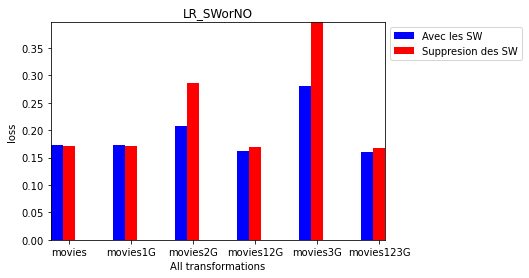

In [127]:
plt.figure()
ax = plt.subplot(111)
ax.bar(x-0.2, valueLRwithSW, width=0.2, color='b', align='center', label="Avec les SW")
ax.bar(x, valueLRwithoutSW, width=0.2, color='r', align='center', label="Suppresion des SW")
ax.set_xlabel('All transformations', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.xticks(x,transf)
plt.title('LR_SWorNO')
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('./graphs/LR_SWorNO.png')

On constate que la suppression des Stop Words ne permet pas d'ameliorer la classification, c'est meme moins bon.

Analysons a present les N-grams, on va regarder ca sur les transformation sans suppression des SW

In [128]:
nogram = [valueLRwithSW[0], valueNBwithSW[0], valueSVCwithSW[0]]
uni_gram = [valueLRwithSW[1], valueNBwithSW[1], valueSVCwithSW[1]]
deux_gram = [valueLRwithSW[2], valueNBwithSW[2], valueSVCwithSW[2]]
uni_deux_grams = [valueLRwithSW[3], valueNBwithSW[3], valueSVCwithSW[3]]
tri_grams = [valueLRwithSW[4], valueNBwithSW[4], valueSVCwithSW[4]]
uni_deux_tri_grams = [valueLRwithSW[5], valueNBwithSW[5], valueSVCwithSW[5]]

In [129]:
xgrams = np.arange(3)

In [130]:
plt.figure()
ax = plt.subplot(111)
ax.bar(xgrams-0.3, nogram, width=0.1, color='b', align='center', label="no gram")
ax.bar(xgrams-0.2, uni_gram, width=0.1, color='g', align='center', label="1-gram")
ax.bar(xgrams-0.1, deux_gram, width=0.1, color='orange', align='center', label="2-gram")
ax.bar(xgrams, uni_deux_grams, width=0.1, color='purple', align='center', label="1-2-grams")
ax.bar(xgrams+0.1, tri_grams, width=0.1, color='brown', align='center', label="3-grams")
ax.bar(xgrams+0.2, uni_deux_tri_grams, width=0.1, color='r', align='center', label="1-2-3-grams")
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.xticks(xgrams,['LR','NB','SVC'])
plt.title('N-Grams')


plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('./graphs/N-Grams.png')

On s'apercoit ici, que le n-grams permet d'ameliorer notre classification.
Toutefois, on peut voir le bi-gram tout seul ne permet pas du tout d'ameliorer le score au contraire elle est bien pire.

Pourquoi est-ce le cas ? Alors il est assez difficile de savoir pourquoi nous avons ca, mais une hypothese qu'on peut en sortir c'est que les termes a 2 lettres sont trop generiques et ne permettent pas d'avoir une distinction et creer donc une confusion.
Le uni-gram a lui seul aussi ne permet pas d'avoir d'amelioration mais ne degrade pas la classiication egalement.

La combinaison des deux permet la d'avoir une amelioration, donc on voit bien ici que a eux seul leurs coupes sont trop petites pour pouvoir avoir une information supplementaire, et c'est en soit assez logique, les lettres sont les memes pour les mots negatifs et positifs avec surement une meme frequence.

Grace a un decoupage en tri-grams, on peut constater une nette amelioration et c'etait un peu predictible car la on peut voir mieux les formes de negations et posities comme par exemple <<'nt>> (negation) ou bien <<'est'>> pour les superlatifs.

In [131]:
nogramSW = [valueLRwithoutSW[0], valueNBwithoutSW[0], valueSVCwithoutSW[0]]
uni_gramSW = [valueLRwithoutSW[1], valueNBwithoutSW[1], valueSVCwithoutSW[1]]
deux_gramSW = [valueLRwithoutSW[2], valueNBwithoutSW[2], valueSVCwithoutSW[2]]
uni_deux_gramsSW = [valueLRwithoutSW[3], valueNBwithoutSW[3], valueSVCwithoutSW[3]]
tri_gramsSW = [valueLRwithoutSW[4], valueNBwithoutSW[4], valueSVCwithoutSW[4]]
uni_deux_tri_gramsSW = [valueLRwithoutSW[5], valueNBwithoutSW[5], valueSVCwithoutSW[5]]

In [132]:
xgramsSW = np.arange(3)

In [133]:
plt.figure()
ax = plt.subplot(111)
ax.bar(xgramsSW-0.3, nogramSW, width=0.1, color='b', align='center', label="no gram")
ax.bar(xgramsSW-0.2, uni_gramSW, width=0.1, color='g', align='center', label="1-gram")
ax.bar(xgramsSW-0.1, deux_gramSW, width=0.1, color='orange', align='center', label="2-gram")
ax.bar(xgramsSW, uni_deux_gramsSW, width=0.1, color='purple', align='center', label="1-2-grams")
ax.bar(xgramsSW+0.1, tri_gramsSW, width=0.1, color='brown', align='center', label="3-grams")
ax.bar(xgramsSW+0.2, uni_deux_tri_gramsSW, width=0.1, color='r', align='center', label="1-2-3-grams")
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.xticks(xgrams,['LR','NB','SVC'])
plt.title('N-Grams avec la suppression des StopWords')


plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('./graphs/N-GramsSW.png')

### Train avec tout le dataset + Prediction du fichier test

In [67]:
vectorizerTFIDF_movies123G_Test = TfidfVectorizer(max_features=10000, ngram_range=(1,3))

In [68]:
vec_movies = vectorizerTFIDF_movies123G_Test.fit_transform(X_movies_transform)

In [69]:
svcPredict = svm.LinearSVC(max_iter=10000, C=2)

In [70]:
svcPredict.fit(vec_movies, y_movies)

LinearSVC(C=2, max_iter=10000)

In [71]:
path = "./testSentiment.txt"
f = open(path,encoding="utf8")
sentiments_tests = np.array(f.readlines())

In [72]:
transform_sentiments_test = transform(sentiments_tests,punc=True,accentMaj=True,nb=True)

In [73]:
vec_sentiments_test = vectorizerTFIDF_movies123G_Test.fit_transform(transform_sentiments_test)

In [74]:
predicts = svcPredict.predict(vec_sentiments_test)

In [75]:
with open('./predictSentiments.txt', 'w') as f:
    for p in predicts:
        f.write(str(p)+'\n')